In [1]:
import pandas as panda
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

import seaborn
!pip install textstat
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.2 MB/s eta 0:00:00


In [2]:
dataset = panda.read_csv("HateSpeechData.csv")
dataset

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @mayasolovely: As a woman you shouldn't...  
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
...                                                  ...  
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...  
24779  you've gone and broke the wrong heart baby, an...  
24780  young buck wanna eat!!.. dat nigguh like I ain...  
24781              youu got wild bitches tellin you lies  
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...  

[24783 rows x 7 columns]

In [3]:
# Adding text-length as a field in the dataset
dataset['text length'] = dataset['tweet'].apply(len)
print(dataset.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  text length  
0  !!! RT @mayasolovely: As a woman you shouldn't...          140  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...           85  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...          120  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...           62  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...          137  


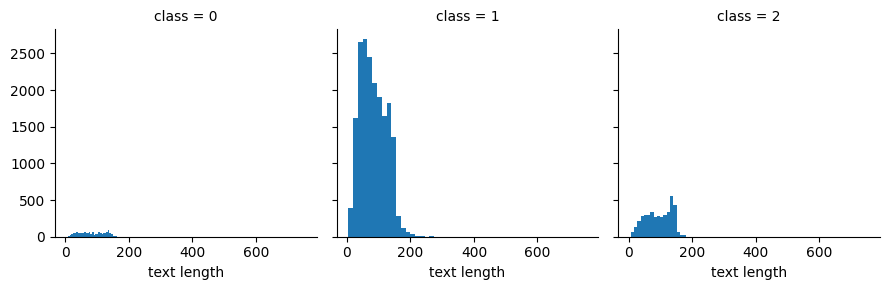

In [4]:
#Basic visualization of data using histograms
# FacetGrid- Multi-plot grid for plotting conditional relationships
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=dataset, col='class')
graph.map(plt.hist, 'text length', bins=50)

<Axes: xlabel='class', ylabel='text length'>

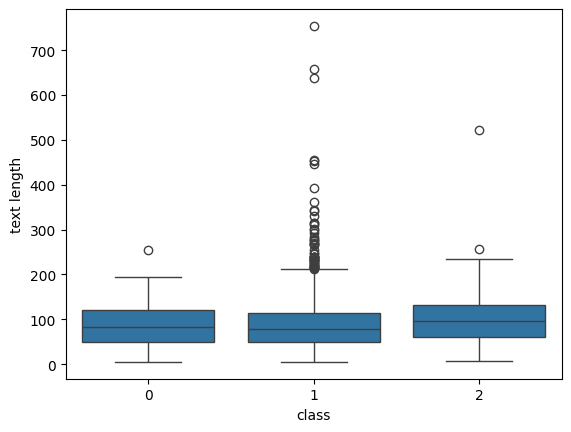

In [5]:
# Box-plot visvualization
sns.boxplot(x='class', y='text length', data=dataset)

<Axes: >

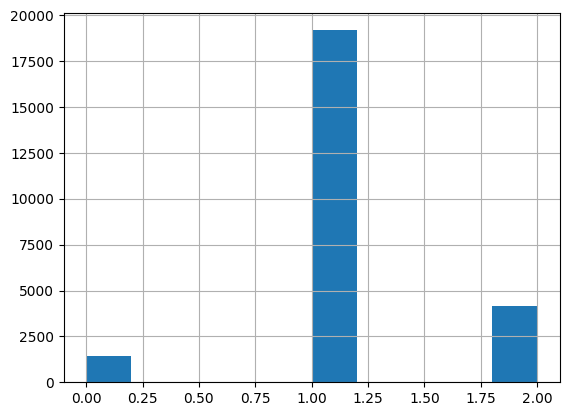

In [6]:
dataset['class'].hist()

In [7]:
# collecting only the tweets from the csv file into a variable name tweet
tweet=dataset.tweet

# PREPROCESSING OF **TWEETS**

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd

# Download stopwords if necessary
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words("english")

# Extending the stopwords to include other Twitter-specific words
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

stemmer = PorterStemmer()

def preprocess(tweet):
    # Remove extra spaces
    tweet_space = tweet.str.replace(r'\s+', ' ', regex=True)

    # Remove @mentions
    tweet_name = tweet_space.str.replace(r'@[\w\-]+', '', regex=True)

    # Remove links
    giant_url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    tweets = tweet_name.str.replace(giant_url_regex, '', regex=True)

    # Remove punctuation and numbers
    punc_remove = tweets.str.replace(r'[^a-zA-Z]', ' ', regex=True)

    # Remove whitespace with a single space and strip leading/trailing spaces
    newtweet = punc_remove.str.replace(r'\s+', ' ', regex=True).str.strip()

    # Replace numbers with "numbr"
    newtweet = newtweet.str.replace(r'\d+(\.\d+)?', 'numbr', regex=True)

    # Convert to lowercase
    tweet_lower = newtweet.str.lower()

    # Tokenize
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())

    # Remove stopwords
    tokenized_tweet = tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])

    # Stem words
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

    # Join tokens back into strings
    tokenized_tweet = tokenized_tweet.apply(lambda x: ' '.join(x))

    return tokenized_tweet

# Assuming 'dataset' is your DataFrame and 'tweet' is the column containing the tweets
processed_tweets = preprocess(dataset['tweet'])
dataset['processed_tweets'] = processed_tweets

# Display the first 10 rows of the original and processed tweets
print(dataset[["tweet", "processed_tweets"]].head(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...   
6  !!!!!!"@__BrighterDays: I can not just sit up ...   
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...   
8  " &amp; you might not get ya bitch back &amp; ...   
9  " @rhythmixx_ :hobbies include: fighting Maria...   

                                    processed_tweets  
0  woman complain clean hous amp man alway take t...  
1  boy dat cold tyga dwn bad cuffin dat hoe st place  
2         dawg ever fuck bitch start cri confus shit  
3                                   look like tranni  
4     shit hear might true might faker bitch told ya  
5      shit blow claim faith somebodi still fuck hoe 

VISUALIZATION

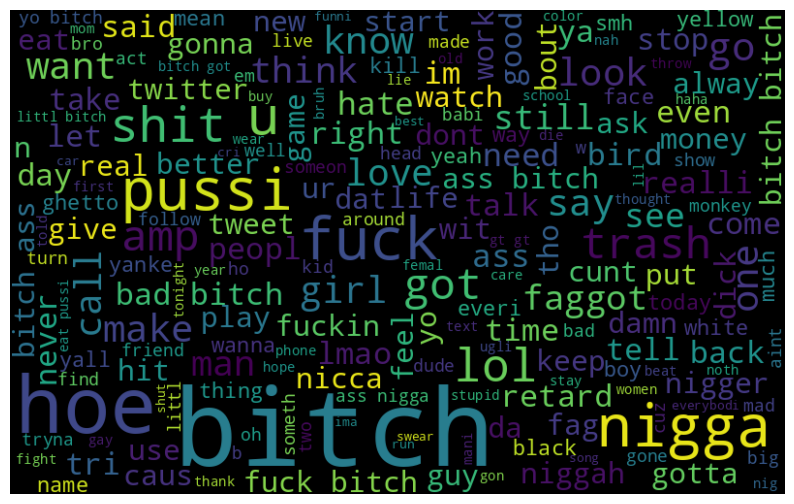

In [9]:
# visualizing which of the word is most commonly used in the twitter dataset
from wordcloud import WordCloud
# imshow-Display data as an image
# interpolation - https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html
all_words = ' '.join([text for text in dataset['processed_tweets'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

VISUALIZATION

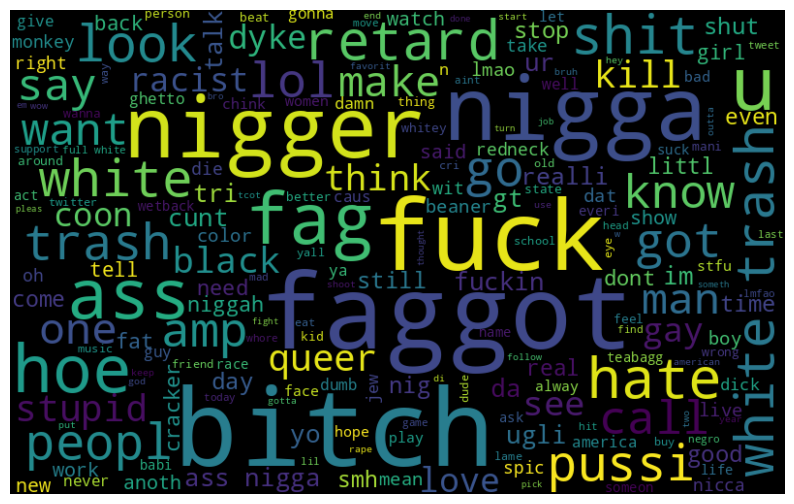

In [10]:
# visualizing which of the word is most commonly used for hatred speech
hatred_words = ' '.join([text for text in dataset['processed_tweets'][dataset['class'] == 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

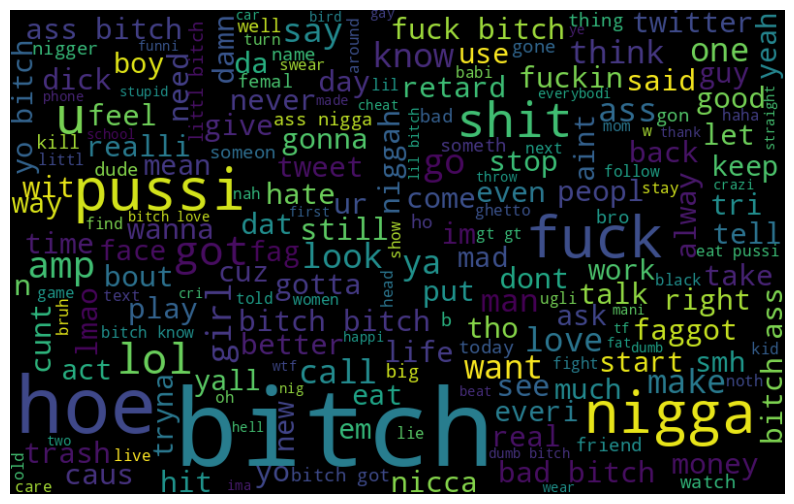

In [11]:
# visualizing which of the word is most commonly used for offensive speech
offensive_words = ' '.join([text for text in dataset['processed_tweets'][dataset['class'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(offensive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
#TF-IDF Features-F1
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=3000)
tfidf_vectorizer.fit(dataset['processed_tweets'])
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(dataset['processed_tweets'] )
tfidf

<24783x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 167551 stored elements in Compressed Sparse Row format>

RUNNING VARIOUS MODEL

In [13]:
# If you don't specify the random_state in the code,
# then every time you run(execute) your code a new random value is generated
# and the train and test datasets would have different values each time.
X = tfidf
y = dataset['class'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
model = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.62      0.20      0.30       164
           1       0.91      0.96      0.94      1905
           2       0.84      0.83      0.84       410

    accuracy                           0.89      2479
   macro avg       0.79      0.66      0.69      2479
weighted avg       0.88      0.89      0.88      2479

Logistic Regression, Accuracy Score: 0.891085114965712


In [14]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.51      0.13      0.21       164
           1       0.93      0.96      0.94      1905
           2       0.84      0.94      0.89       410

    accuracy                           0.90      2479
   macro avg       0.76      0.68      0.68      2479
weighted avg       0.88      0.90      0.89      2479

Random Forest, Accuracy Score: 0.9027833803953207


In [15]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.1)
nb=GaussianNB()
nb.fit(X_train_tfidf,y_train)
y_preds = nb.predict(X_test_tfidf)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.09      0.57      0.16       164
           1       0.93      0.49      0.64      1905
           2       0.51      0.58      0.54       410

    accuracy                           0.51      2479
   macro avg       0.51      0.54      0.45      2479
weighted avg       0.80      0.51      0.59      2479

Naive Bayes, Accuracy Score: 0.5082694634933441


In [16]:
support =LinearSVC(random_state=20)
support.fit(X_train_tfidf,y_train)
y_preds = support.predict(X_test_tfidf)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.60      0.23      0.33       164
           1       0.91      0.96      0.93      1905
           2       0.83      0.84      0.84       410

    accuracy                           0.89      2479
   macro avg       0.78      0.68      0.70      2479
weighted avg       0.88      0.89      0.88      2479

SVM, Accuracy Score: 0.891085114965712


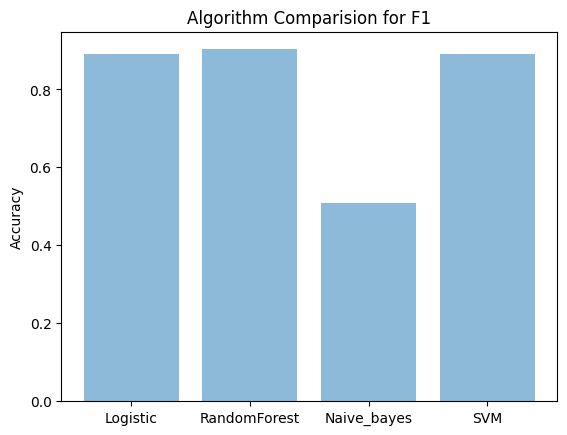

In [17]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')
plt.show()

SENTIMENTAL ANALYSIS USING POLARITY FEATURE

In [18]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
import nltk
nltk.download('vader_lexicon')  # Download the vader_lexicon resource

from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import re
import numpy as np
import pandas as pd

# Initialize VADER sentiment analyzer
sentiment_analyzer = VS()

def count_tags(tweet_c):
    space_pattern = r'\s+'
    giant_url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    mention_regex = r'@[\w\-]+'
    hashtag_regex = r'#[\w\-]+'

    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)

    return (parsed_text.count('URLHERE'), parsed_text.count('MENTIONHERE'), parsed_text.count('HASHTAGHERE'))

def sentiment_analysis(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    twitter_objs = count_tags(tweet)

    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],
                twitter_objs[0], twitter_objs[1], twitter_objs[2]]

    return features

def sentiment_analysis_array(tweets):
    features = []
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

# Assuming 'tweet' is a list or pandas Series of tweets
final_features = sentiment_analysis_array(tweet)

# Create a DataFrame from the final features
new_features = pd.DataFrame({
    'Neg': final_features[:, 0],
    'Pos': final_features[:, 1],
    'Neu': final_features[:, 2],
    'Compound': final_features[:, 3],
    'url_tag': final_features[:, 4],
    'mention_tag': final_features[:, 5],
    'hash_tag': final_features[:, 6]
})

new_features


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Neg    Pos    Neu  Compound  url_tag  mention_tag  hash_tag
0      0.000  0.120  0.880    0.4563      0.0          1.0       0.0
1      0.237  0.000  0.763   -0.6876      0.0          1.0       0.0
2      0.538  0.000  0.462   -0.9550      0.0          2.0       0.0
3      0.000  0.344  0.656    0.5673      0.0          2.0       0.0
4      0.249  0.081  0.669   -0.7762      0.0          1.0       1.0
...      ...    ...    ...       ...      ...          ...       ...
24778  0.000  0.000  1.000    0.0000      0.0          3.0       3.0
24779  0.454  0.000  0.546   -0.8074      0.0          0.0       0.0
24780  0.000  0.219  0.781    0.4738      0.0          0.0       0.0
24781  0.573  0.000  0.427   -0.7717      0.0          0.0       0.0
24782  0.000  0.218  0.782    0.5994      1.0          0.0       0.0

[24783 rows x 7 columns]

In [20]:
# F2-Conctaenation of tf-idf scores and sentiment scores
tfidf_a = tfidf.toarray()
modelling_features = np.concatenate([tfidf_a,final_features],axis=1)
modelling_features.shape

(24783, 3007)

Running the models Using TFIDF with additional features

In [21]:
# Running the model Using TFIDF with some features from sentiment analysis
X = panda.DataFrame(modelling_features)
y = dataset['class'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

model = LogisticRegression().fit(X_train_bow,y_train)
y_preds = model.predict(X_test_bow)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.62      0.20      0.30       164
           1       0.91      0.97      0.94      1905
           2       0.85      0.85      0.85       410

    accuracy                           0.90      2479
   macro avg       0.79      0.67      0.69      2479
weighted avg       0.88      0.90      0.88      2479

Logistic Regression, Accuracy Score: 0.8951189995966116


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
X = panda.DataFrame(modelling_features)
y = dataset['class'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
rf=RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_preds = rf.predict(X_test_bow)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.56      0.12      0.19       164
           1       0.91      0.96      0.94      1905
           2       0.84      0.87      0.85       410

    accuracy                           0.89      2479
   macro avg       0.77      0.65      0.66      2479
weighted avg       0.87      0.89      0.87      2479

Random Forest, Accuracy Score: 0.8914885034288019


In [23]:
X = panda.DataFrame(modelling_features)
y = dataset['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
nb=GaussianNB()
nb.fit(X_train,y_train)
y_preds = nb.predict(X_test)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.09      0.56      0.16       164
           1       0.93      0.49      0.64      1905
           2       0.53      0.63      0.58       410

    accuracy                           0.52      2479
   macro avg       0.52      0.56      0.46      2479
weighted avg       0.81      0.52      0.60      2479

Naive Bayes, Accuracy Score: 0.5191609519967729


In [24]:
X = panda.DataFrame(modelling_features)
y = dataset['class'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
support =LinearSVC(random_state=20)
support.fit(X_train_bow,y_train)
y_preds = support.predict(X_test_bow)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.61      0.24      0.34       164
           1       0.91      0.96      0.94      1905
           2       0.85      0.84      0.84       410

    accuracy                           0.89      2479
   macro avg       0.79      0.68      0.71      2479
weighted avg       0.88      0.89      0.88      2479

SVM, Accuracy Score: 0.8935054457442517


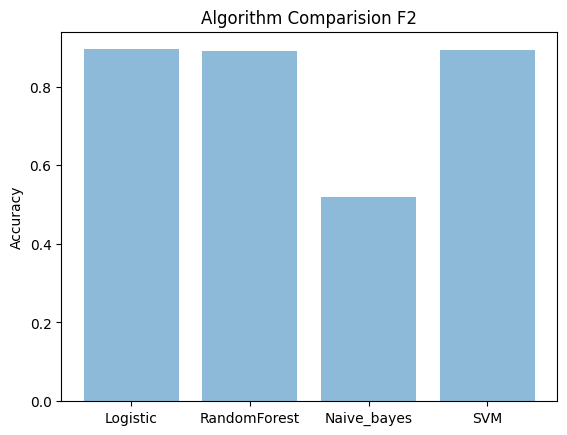

In [25]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision F2')
plt.show()

In [26]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# The input for a Doc2Vec model should be a list of TaggedDocument(['list', 'of', 'words'], [TAG_001]).
# A good practice is using the indexes of sentences as the tags.
documents = [TaggedDocument(doc.split(" "), [i]) for i, doc in enumerate(dataset["processed_tweets"])]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# infer_vector - Infer a vector for the given post-bulk training document.
# Syntax: infer_vector(doc_words, alpha=None, min_alpha=None, epochs=None, steps=None)
# doc_words - A document for which the vector representation will be inferred.

# transform each document into a vector data
doc2vec_df = dataset["processed_tweets"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]

doc2vec_df.head()


doc2vec_vector_0  doc2vec_vector_1  doc2vec_vector_2  doc2vec_vector_3  \
0         -0.073467          0.146760          0.111152         -0.058560   
1          0.107898          0.123917          0.269616         -0.065508   
2         -0.089861          0.015873         -0.015845         -0.024038   
3         -0.048277          0.022791         -0.061180         -0.109213   
4         -0.036013          0.029313          0.084990         -0.077700   

   doc2vec_vector_4  
0          0.097757  
1         -0.074426  
2         -0.069196  
3          0.111345  
4         -0.178842

In [27]:
# conctaenation of tf-idf scores, sentiment scores and doc2vec columns
modelling_features = np.concatenate([tfidf_a,final_features,doc2vec_df],axis=1)
modelling_features.shape

(24783, 3012)

Running the models Using TFIDF with additional features from sentiment analysis and doc2vec

In [28]:
X = panda.DataFrame(modelling_features)
y = dataset['class'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

model = LogisticRegression().fit(X_train_bow,y_train)
y_preds = model.predict(X_test_bow)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.60      0.18      0.27       164
           1       0.91      0.97      0.94      1905
           2       0.86      0.86      0.86       410

    accuracy                           0.90      2479
   macro avg       0.79      0.67      0.69      2479
weighted avg       0.88      0.90      0.88      2479

Logistic Regression, Accuracy Score: 0.8975393303751513


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
X = panda.DataFrame(modelling_features)
y = dataset['class'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
rf=RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_preds = rf.predict(X_test_bow)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.68      0.08      0.14       164
           1       0.90      0.98      0.94      1905
           2       0.86      0.81      0.84       410

    accuracy                           0.89      2479
   macro avg       0.81      0.62      0.64      2479
weighted avg       0.88      0.89      0.87      2479

Random Forest, Accuracy Score: 0.8898749495764421


In [30]:
X = panda.DataFrame(modelling_features)
y = dataset['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
nb=GaussianNB()
nb.fit(X_train,y_train)
y_preds = nb.predict(X_test)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.09      0.56      0.16       164
           1       0.93      0.49      0.64      1905
           2       0.53      0.63      0.58       410

    accuracy                           0.52      2479
   macro avg       0.52      0.56      0.46      2479
weighted avg       0.81      0.52      0.60      2479

Naive Bayes, Accuracy Score: 0.5191609519967729


In [31]:
X = panda.DataFrame(modelling_features)
y = dataset['class'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
support =LinearSVC(random_state=20)
support.fit(X_train_bow,y_train)
y_preds = support.predict(X_test_bow)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.55      0.22      0.31       164
           1       0.91      0.96      0.94      1905
           2       0.85      0.84      0.84       410

    accuracy                           0.89      2479
   macro avg       0.77      0.67      0.70      2479
weighted avg       0.88      0.89      0.88      2479

SVM, Accuracy Score: 0.8918918918918919


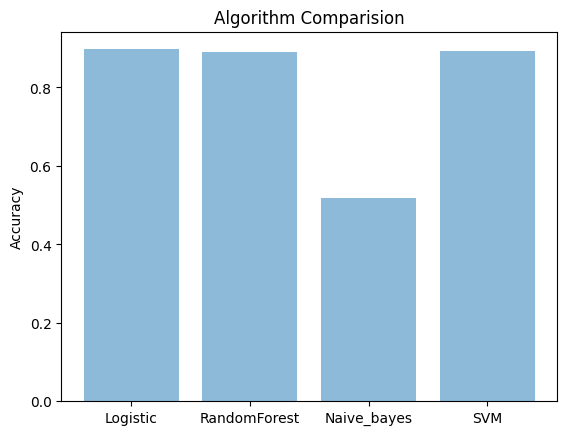

In [32]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision')
plt.show()

In [33]:
#Using TFIDF with sentiment scores,doc2vec and enhanced features
def additional_features(tweet):

    syllables = textstat.syllable_count(tweet)
    num_chars = sum(len(w) for w in tweet)
    num_chars_total = len(tweet)
    num_words = len(tweet.split())
    # avg_syl = total syllables/ total words
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_terms = len(set(tweet.split()))



    ###Modified FK grade, where avg words per sentence is : just num words/1
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    ##Modified FRE score, where sentence fixed to 1
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)

    add_features=[FKRA, FRE,syllables, avg_syl, num_chars, num_chars_total, num_words,
                num_unique_terms]
    return add_features

def get_additonal_feature_array(tweets):
    features=[]
    for t in tweets:
        features.append(additional_features(t))
    return np.array(features)

fFeatures = get_additonal_feature_array(processed_tweets)


In [34]:
tfidf_a = tfidf.toarray()
modelling_features_enhanced = np.concatenate([tfidf_a,final_features,doc2vec_df,fFeatures],axis=1)
modelling_features_enhanced.shape


(24783, 3020)

Running the model Using TFIDF with enhanced features   with sentiment scores,doc2vec and enhanced features

In [35]:
# Running the model Using TFIDF with enhanced features

X = panda.DataFrame(modelling_features_enhanced)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)

model = LogisticRegression().fit(X_train_features,y_train)
y_preds = model.predict(X_test_features)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)


              precision    recall  f1-score   support

           0       1.00      0.01      0.01       145
           1       0.83      0.96      0.89      1928
           2       0.65      0.38      0.48       406

    accuracy                           0.81      2479
   macro avg       0.83      0.45      0.46      2479
weighted avg       0.81      0.81      0.77      2479

Logistic Regression, Accuracy Score: 0.8128277531262605


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


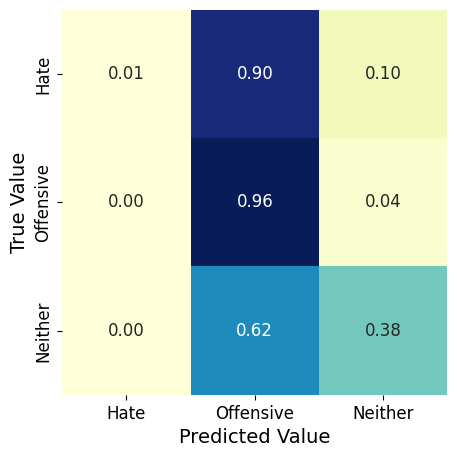

In [36]:
#Confusion Matrix for TFIDF with additional features
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

# From the confusion matrix its clear that the model misclassifies 78% of the hate data as offensive data. This explains the reduction in class-0
# bar on the histogram for the predicted class and increase of bar for class-1 (offensive).

In [37]:
testing_index=list(X_test_features.index[0:10])
#print(testing_index)
print("Predicted Class:",y_preds[0:10])
print("Actual Class:",y_test.tolist()[0:10])

Predicted Class: [1 1 1 1 1 1 1 1 1 1]
Actual Class: [2, 1, 1, 0, 2, 1, 1, 1, 2, 2]


Text(0, 0.5, 'Count')

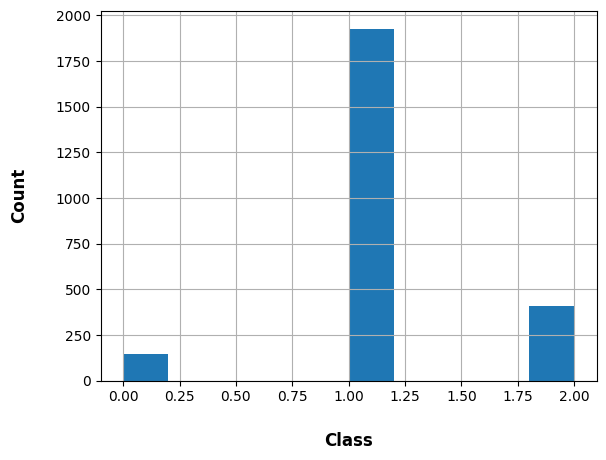

In [38]:
# Histogram presenting the count of different classes- Actual
ax=y_test.hist()
ax.set_xlabel("Class", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Count", labelpad=20, weight='bold', size=12)

Text(0, 0.5, 'Count')

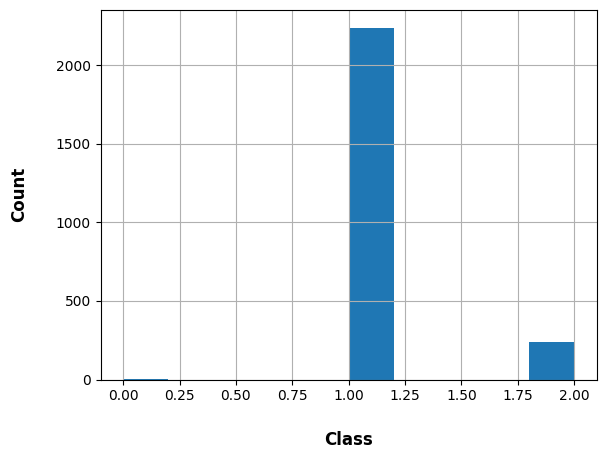

In [39]:
# Histogram presenting the count of different classes- Predicted
ax=panda.Series(y_preds).hist()
ax.set_xlabel("Class", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Count", labelpad=20, weight='bold', size=12)


In [40]:
X = panda.DataFrame(modelling_features_enhanced)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)
rf=RandomForestClassifier()
rf.fit(X_train_features,y_train)
y_preds = rf.predict(X_test_features)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.62      0.09      0.16       145
           1       0.90      0.97      0.93      1928
           2       0.84      0.75      0.79       406

    accuracy                           0.89      2479
   macro avg       0.78      0.60      0.63      2479
weighted avg       0.87      0.89      0.86      2479

Random Forest, Accuracy Score: 0.8854376764824526


In [41]:
X = panda.DataFrame(modelling_features_enhanced)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)
nb=GaussianNB()
nb.fit(X_train_features,y_train)
y_preds = nb.predict(X_test_features)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.09      0.57      0.15       145
           1       0.94      0.49      0.65      1928
           2       0.56      0.69      0.62       406

    accuracy                           0.53      2479
   macro avg       0.53      0.58      0.47      2479
weighted avg       0.82      0.53      0.61      2479

Naive Bayes, Accuracy Score: 0.5292456635740218


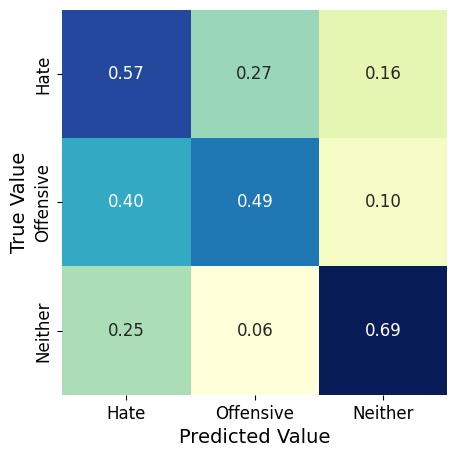

In [42]:
#Confusion Matrix for TFIDF with additional features
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

In [43]:
X = panda.DataFrame(modelling_features_enhanced)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test_helo = train_test_split(X, y, random_state=0, test_size=0.1)
support =LinearSVC(random_state=20)
support.fit(X_train_features,y_train)
y_preds = support.predict(X_test_features)
acc3=accuracy_score(y_test_helo,y_preds)
report = classification_report( y_test_helo, y_preds )
print(report)
print("SVM, Accuracy Score:" ,acc3 )

              precision    recall  f1-score   support

           0       0.46      0.26      0.33       145
           1       0.93      0.95      0.94      1928
           2       0.85      0.89      0.87       406

    accuracy                           0.90      2479
   macro avg       0.75      0.70      0.71      2479
weighted avg       0.89      0.90      0.90      2479

SVM, Accuracy Score: 0.9027833803953207


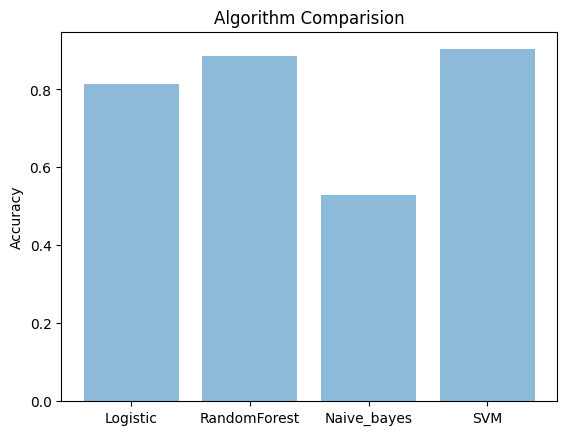

In [44]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision')
plt.show()

Combining different **features**

In [45]:
#f1,f3 and f4 combined

tfidf_a = tfidf.toarray()
modelling_features_one = np.concatenate([tfidf_a,doc2vec_df,fFeatures],axis=1)
modelling_features_one.shape

(24783, 3013)

In [46]:
X = panda.DataFrame(modelling_features_one)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)
support =LinearSVC(random_state=20)
support.fit(X_train_features,y_train)
y_preds = support.predict(X_test_features)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" ,acc3 )

              precision    recall  f1-score   support

           0       0.45      0.27      0.34       145
           1       0.93      0.95      0.94      1928
           2       0.85      0.89      0.87       406

    accuracy                           0.90      2479
   macro avg       0.74      0.70      0.72      2479
weighted avg       0.89      0.90      0.89      2479

SVM, Accuracy Score: 0.9015732150060508


In [47]:
#f1,f2 and f4 combined
tfidf_a = tfidf.toarray()
modelling_features_two = np.concatenate([tfidf_a,final_features,fFeatures],axis=1)
modelling_features_two.shape



(24783, 3015)

In [48]:
import pandas

In [49]:
 # Make sure pandas is imported as pd

X = pd.DataFrame(modelling_features_two)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)
support =LinearSVC(random_state=20)
support.fit(X_train_features,y_train)
y_preds = support.predict(X_test_features)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" ,acc3 )


              precision    recall  f1-score   support

           0       0.46      0.26      0.33       145
           1       0.93      0.95      0.94      1928
           2       0.85      0.88      0.86       406

    accuracy                           0.90      2479
   macro avg       0.74      0.69      0.71      2479
weighted avg       0.89      0.90      0.89      2479

SVM, Accuracy Score: 0.899556272690601


In [50]:
import pandas as panda

In [51]:
X = panda.DataFrame(modelling_features_two)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)
support =LinearSVC(random_state=20)
support.fit(X_train_features,y_train)
y_preds = support.predict(X_test_features)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" ,acc3 )

              precision    recall  f1-score   support

           0       0.46      0.26      0.33       145
           1       0.93      0.95      0.94      1928
           2       0.85      0.88      0.86       406

    accuracy                           0.90      2479
   macro avg       0.74      0.69      0.71      2479
weighted avg       0.89      0.90      0.89      2479

SVM, Accuracy Score: 0.899556272690601


In [52]:
#f2,f3 and f4 combined
modelling_features_three = np.concatenate([final_features,fFeatures],axis=1)
modelling_features_three.shape

(24783, 15)

In [53]:
X = panda.DataFrame(modelling_features_three)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)
support =LinearSVC(random_state=20)
support.fit(X_train_features,y_train)
y_preds = support.predict(X_test_features)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" ,acc3 )

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.80      0.98      0.88      1928
           2       0.63      0.19      0.29       406

    accuracy                           0.79      2479
   macro avg       0.48      0.39      0.39      2479
weighted avg       0.73      0.79      0.73      2479

SVM, Accuracy Score: 0.7922549415086728


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



# the most important feature we found to be was the tf-idf scores which helps in better classification of hate speech.
# Doc2vec columns are not found to be very significant in classification purpose as it makes very less difference when
#its removed form the feature set. SVM's and RF's performance is hugely impacted when tf-idf scores are not included in the feature set.

In [55]:
X = panda.DataFrame(modelling_features_two)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)
nb=GaussianNB()
nb.fit(X_train_features,y_train)
y_preds = nb.predict(X_test_features)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.09      0.57      0.15       145
           1       0.94      0.49      0.65      1928
           2       0.56      0.69      0.62       406

    accuracy                           0.53      2479
   macro avg       0.53      0.58      0.47      2479
weighted avg       0.82      0.53      0.61      2479

Naive Bayes, Accuracy Score: 0.5292456635740218


# Naive Baiyes Classifier performs significantly better with feature set of f-2,3,4 which
#actually performs poor for Logistic Regression especially in prediction of "hate" label.

In [56]:
X = panda.DataFrame(modelling_features_two)
y = dataset['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)

model = LogisticRegression().fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       145
           1       0.83      0.95      0.89      1928
           2       0.57      0.36      0.44       406

    accuracy                           0.80      2479
   macro avg       0.80      0.44      0.45      2479
weighted avg       0.79      0.80      0.76      2479

Logistic Regression, Accuracy Score: 0.800322710770472


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
X = panda.DataFrame(modelling_features_three)
y = dataset['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_preds = rf.predict(X_test)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.14      0.02      0.04       145
           1       0.82      0.93      0.87      1928
           2       0.47      0.31      0.37       406

    accuracy                           0.78      2479
   macro avg       0.48      0.42      0.43      2479
weighted avg       0.72      0.78      0.74      2479

Random Forest, Accuracy Score: 0.7769261799112546


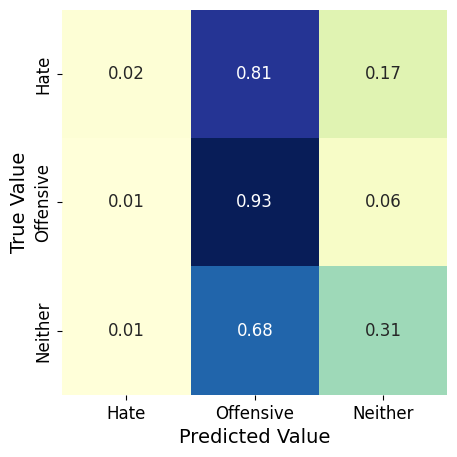

In [58]:
#Confusion Matrix for TFIDF with additional features
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

In [63]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import re

# Load dataset
df = pd.read_csv('HateSpeechData.csv')

# Label encoding
le = LabelEncoder()
df['label'] = le.fit_transform(df['class'])

# Preprocessing the text (remove special characters, URLs, etc.)
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text

df['processed_tweet'] = df['tweet'].apply(preprocess_text)

# Splitting data into train and test sets
X = df['processed_tweet']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF Vectorizer and Logistic Regression model
model = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))

# Train the model
model.fit(X_train, y_train)

# Evaluate the model (optional)
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy:.4f}')

Model Accuracy: 0.8876


In [64]:
print(df.head())

# Function to predict user input
def predict_tweet(tweet):
    tweet = preprocess_text(tweet)
    prediction = model.predict([tweet])
    predicted_class = le.inverse_transform(prediction)
    return predicted_class[0]

# Example of predicting a tweet
user_input = input("Enter a tweet to predict: ")
prediction = predict_tweet(user_input)

print(f"Predicted Class: {prediction}")

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  label  \
0  !!! RT @mayasolovely: As a woman you shouldn't...      2   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...      1   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...      1   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...      1   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...      1   

                                     processed_tweet  
0   RT mayasolovely As a woman you shouldnt compl...  
1   RT mleew17 boy dats coldtyga dwn bad for cuff...  
2   RT UrKindOfBr